# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

---

**⚠️ Caution: This notebook was automatically generated by AI. It has not been manually reviewed or verified. Please interpret all code, results, and conclusions with care and use your own scientific judgment.**

---

## Overview of Dandiset 001375

- **Title:** Septum GABA disruption with DREADDs
- **Version:** 0.250406.1855
- **Description:** Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity.
- **Contributors:** Michael Eckert, Bruce McNaughton, Janina Ferbinteanu, NIH Brain
- **License:** CC-BY-4.0
- **DOI/Citation:** Eckert, Michael; McNaughton, Bruce; Ferbinteanu, Janina (2025) Septum GABA disruption with DREADDs (Version 0.250406.1855) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001375/0.250406.1855

- **Dandiset landing page:** [View Dandiset](https://dandiarchive.org/dandiset/001375/0.250406.1855)

This Dandiset contains extracellular electrophysiology data (NWB format) from experiments disrupting septal GABAergic activity in mouse brain using DREADDs. It includes data on raw electrode recordings, sorted units (spikes), electrode/animal/trial metadata, and more.

---

## Notebook Guide

This notebook demonstrates how to:
- Connect to the DANDI archive and list available assets.
- Load and summarize the contents of an NWB file remotely, using PyNWB and related tools.
- Visualize raw extracellular signals and spike times for selected units.
- Provide links and pointers for further exploration.

Throughout, markdown cells will explain each major step.

## Required Python Packages

To run this notebook, the following packages must be installed:
- numpy
- matplotlib
- pandas
- pynwb
- h5py
- remfile

(Assumed installed; do not run `pip install` commands here.)

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive and list some assets
client = DandiAPIClient()
dandiset = client.get_dandiset("001375", "0.250406.1855")
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

assets = dandiset.get_assets()
print("\nFirst 5 assets (may be fewer):")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855

First 5 assets (may be fewer):
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb (ID: ce525828-8534-4b56-9e47-d2a34d1aa897)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb (ID: 376dc673-611b-4521-b135-9ec01c7f4f74)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb (ID: fea95c0e-2f07-49a3-b607-4b7e9f278e16)


## NWB File Selected for Exploration

We'll focus on:  
**sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb**  
([Direct NWB download link](https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/))  
[View in Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft)

This file contains multichannel extracellular ephys recordings, spike-sorted units, electrode metadata, and trial structure.

## How to Load the NWB File (Remote Streaming)

NWB files in the DANDI Archive can be accessed via remote streaming (without downloading) using PyNWB, h5py, and remfile:
```python
import pynwb
import h5py
import remfile

url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()
```
For large datasets, access only the needed slices. See examples below.

In [2]:
import pynwb
import h5py
import remfile

url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Basic Metadata for the NWB File

In [3]:
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject species: {nwb.subject.species}")
print(f"Subject sex: {nwb.subject.sex}")
print(f"Subject age: {nwb.subject.age}")
print(f"Subject description: {nwb.subject.description}")

# Trials/units/electrodes summary
print(f"Number of trials: {nwb.trials.to_dataframe().shape[0]}")
print(f"Number of units (spike-sorted): {nwb.units.to_dataframe().shape[0]}")
print(f"Number of electrodes: {nwb.electrodes.to_dataframe().shape[0]}")

Session description: mouse running laps in virtual hallway
Session start time: 2024-07-25 19:00:00-07:00
Subject ID: MS13B
Subject species: Mus musculus
Subject sex: M
Subject age: P90D
Subject description: medial septum DREADD to suppress GABA interneurons
Number of trials: 387


Number of units (spike-sorted): 33
Number of electrodes: 256


## Structure of the NWB File

The file contains:
- Multichannel raw voltage traces (256 channels, 30 kHz sample rate)
- Trials ("laps"), units (spike times), electrode metadata
- Session/subject/equipment details

Example key elements:

| Key                 | Example/Description                                              |
|---------------------|-----------------------------------------------------------------|
| `session_description` | "mouse running laps in virtual hallway"                     |
| `subject`           | MS13B, Mus musculus, DREADD ms GABA interneurons             |
| `acquisition["time_series"]` | TimeSeries object with .data shape (144,675,584, 256) |
| `trials`            | 387 rows, each with start and stop time                       |
| `units`             | 33 units, each with spike times                               |
| `electrodes`        | 256 electrodes, each with location, group, etc.               |

## Preview: Raw Data Snippet

We'll plot the first 60 seconds (~1.8 million samples) from the first 4 channels of the main acquisition ("time_series").  
**Note:** Channel 3 displays unusually high amplitude/noise. This may indicate a data quality or hardware issue and should be considered during further analysis.

/tmp/ipykernel_84852/892624813.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


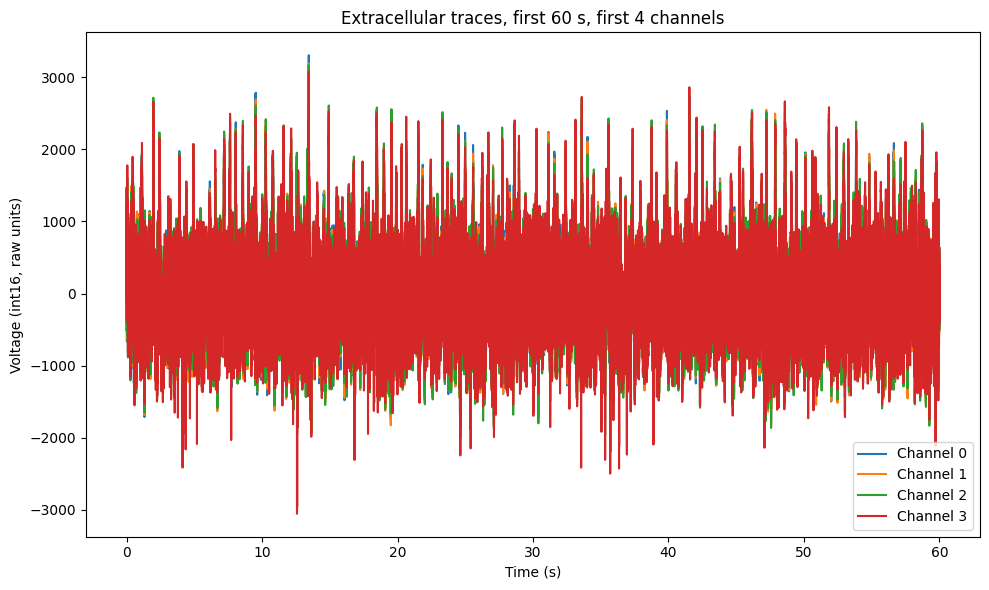

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = nwb.acquisition["time_series"].data
rate = nwb.acquisition["time_series"].rate
preview_duration_sec = 60
preview_samples = int(preview_duration_sec * rate)
n_channels_to_plot = 4

t = np.arange(preview_samples) / rate
plt.figure(figsize=(10, 6))
for i in range(n_channels_to_plot):
    if i < data.shape[1]:
        channel_data = data[0:preview_samples, i]
        plt.plot(t, channel_data, label=f"Channel {i}")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (int16, raw units)")
plt.title("Extracellular traces, first 60 s, first 4 channels")
plt.legend()
plt.tight_layout()
plt.show()

As seen above, Channels 0–2 show plausible neural signals, but Channel 3 shows excessive amplitude (possibly an artifact). Always inspect raw signals before further analysis.

## Spike Times: First 5 Units

We'll summarize and visualize spike times for the first five units, for the first 100 seconds.

In [5]:
import pandas as pd

units_df = nwb.units.to_dataframe()
print(f"Units table shape: {units_df.shape}")
print("First 5 rows of unit spike counts:")
for i in range(min(5, len(units_df))):
    spike_times = units_df.iloc[i]['spike_times']
    if isinstance(spike_times, np.ndarray):
        n_spikes = len(spike_times)
    else:
        n_spikes = "N/A"
    print(f"Unit {units_df.index[i]}: {n_spikes} spikes")

Units table shape: (33, 1)
First 5 rows of unit spike counts:
Unit 1: 18960 spikes
Unit 2: 100435 spikes
Unit 3: 278061 spikes
Unit 4: 36265 spikes
Unit 5: 39735 spikes


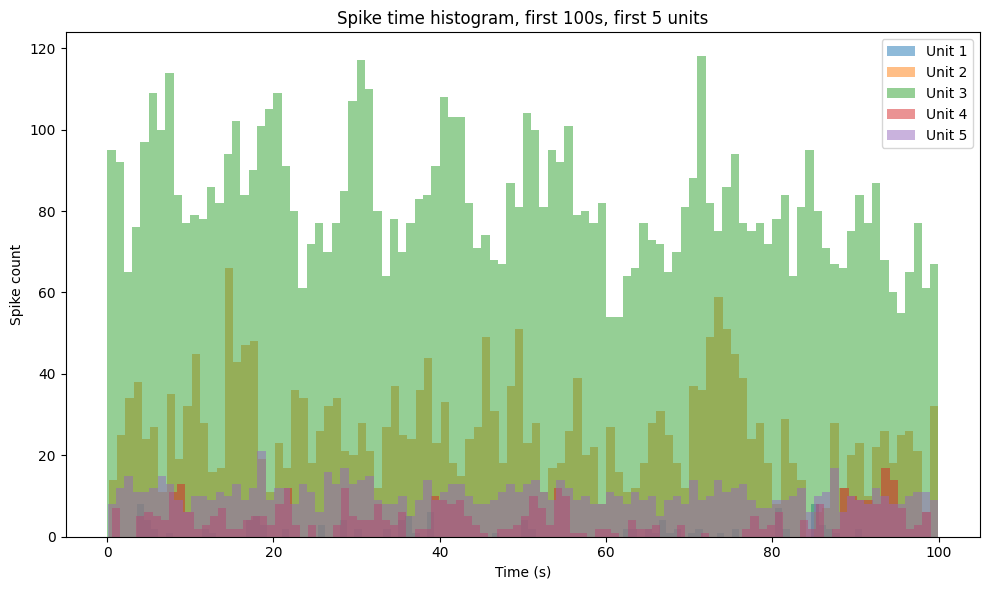

In [6]:
plt.figure(figsize=(10,6))
for i in range(min(5, len(units_df))):
    spike_times = units_df.iloc[i]['spike_times']
    if isinstance(spike_times, np.ndarray):
        valid = spike_times[spike_times < 100]
        plt.hist(valid, bins=100, alpha=0.5, label=f'Unit {units_df.index[i]}')
plt.xlabel("Time (s)")
plt.ylabel("Spike count")
plt.title("Spike time histogram, first 100s, first 5 units")
plt.legend()
plt.tight_layout()
plt.show()

The histogram above gives a basic overview of population activity and relative unit firing rates. Unit 3 dominates, suggesting higher firing activity or differences in detection. Further analysis could isolate individual units or rescale histograms for finer comparison.

## Future Directions and Additional Analysis

The NWB file includes:
- Full raw signal data (> 4800 s x 256 channels)
- Spike sorting results for 33 units
- Rich trial/electrode/subject metadata

Possible next steps for analysis might include:
- Visualizing activity per trial or condition
- Relating spiking to behavioral intervals
- Examining additional units across time/electrodes
- Cross-mapping electrode group locations to signals or unit properties

Refer to [Neurosift visualization](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft) for advanced NWB browsing.

In [7]:
io.close()
h5_file.close()
remote_file.close()